In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 645 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

Symbols = ["META"]

In [3]:
#time
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2022,11,1)

In [4]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol

for i in Symbols:  
   
    # print the symbol which is being downloaded
    #print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
   
    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)      
        # append the individual stock prices
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
stock

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200,META
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,META
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100,META
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300,META
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800,META
...,...,...,...,...,...,...,...
2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200,META
2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500,META
2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600,META


In [5]:
stock_final = stock_final[["Open","High","Low","Close","Volume"]]
stock_final = stock_final.round(2)
stock_final["Date"] = stock_final.index
stock_final = stock_final.fillna(method="ffill")
stock_final

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-01-02,128.99,137.51,128.56,135.68,28146200,2019-01-02
2019-01-03,134.69,137.17,131.12,131.74,22717900,2019-01-03
2019-01-04,134.01,138.00,133.75,137.95,29002100,2019-01-04
2019-01-07,137.56,138.87,135.91,138.05,20089300,2019-01-07
2019-01-08,139.89,143.14,139.54,142.53,26263800,2019-01-08
...,...,...,...,...,...,...
2022-10-25,130.88,138.35,130.59,137.51,38433200,2022-10-25
2022-10-26,131.68,135.55,128.53,129.82,82791500,2022-10-26
2022-10-27,97.98,102.50,96.38,97.94,232316600,2022-10-27


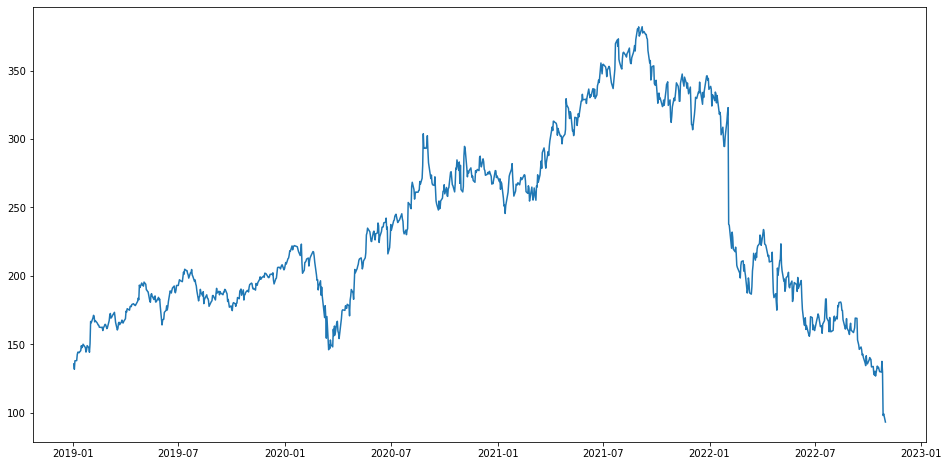

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))

plt.plot(stock_final['Close'], label='Close Price history')

In [7]:
from sklearn import neighbors

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
new_data = stock_final
new_data

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-01-02,128.99,137.51,128.56,135.68,28146200,2019-01-02
2019-01-03,134.69,137.17,131.12,131.74,22717900,2019-01-03
2019-01-04,134.01,138.00,133.75,137.95,29002100,2019-01-04
2019-01-07,137.56,138.87,135.91,138.05,20089300,2019-01-07
2019-01-08,139.89,143.14,139.54,142.53,26263800,2019-01-08
...,...,...,...,...,...,...
2022-10-25,130.88,138.35,130.59,137.51,38433200,2022-10-25
2022-10-26,131.68,135.55,128.53,129.82,82791500,2022-10-26
2022-10-27,97.98,102.50,96.38,97.94,232316600,2022-10-27


In [11]:
new_data.index = np.arange(1,len(new_data["Date"])+1)

def dt64_to_float(dt64):
    year = dt64.astype('M8[Y]')
    days = (dt64 - year).astype('timedelta64[D]')
    year_next = year + np.timedelta64(1, 'Y')
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    return dt_float

new_data['Date'] = dt64_to_float(new_data['Date'].to_numpy())

new_data

,Open,High,Low,Close,Volume,Date
1,128.99,137.51,128.56,135.68,28146200,2019.002740
2,134.69,137.17,131.12,131.74,22717900,2019.005479
3,134.01,138.00,133.75,137.95,29002100,2019.008219
4,137.56,138.87,135.91,138.05,20089300,2019.016438
5,139.89,143.14,139.54,142.53,26263800,2019.019178
...,...,...,...,...,...,...
962,130.88,138.35,130.59,137.51,38433200,2022.813699
963,131.68,135.55,128.53,129.82,82791500,2022.816438
964,97.98,102.50,96.38,97.94,232316600,2022.819178
965,99.58,100.85,97.51,99.20,95928300,2022.821918


In [12]:
train = new_data[:759]

test = new_data[759:]

 

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']
x_test

,Open,High,Low,Volume,Date
760,333.02,335.76,323.84,20564500,2022.010959
761,322.82,339.17,322.72,27962800,2022.013699
762,332.74,337.00,328.88,14722000,2022.016438
763,325.31,328.34,315.43,24942400,2022.024658
764,326.78,334.63,325.28,16226800,2022.027397
...,...,...,...,...,...
962,130.88,138.35,130.59,38433200,2022.813699
963,131.68,135.55,128.53,82791500,2022.816438
964,97.98,102.50,96.38,232316600,2022.819178
965,99.58,100.85,97.51,95928300,2022.821918


In [13]:
x_train_scaled = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test_scaled)

 

#using gridsearch to find the best parameter

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()



model = GridSearchCV(knn, params, cv=5)

 

#fit the model and make predictions

model.fit(x_train,y_train)

preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


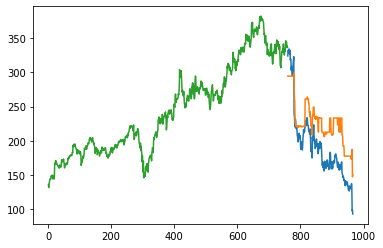

In [14]:
test['Predictions'] = 0

test['Predictions'] = preds

plt.plot(test[['Close', 'Predictions']])

plt.plot(train['Close'])